# Python From Zero to One: Chaos Games Example

[Reference Source](https://qmplus.qmul.ac.uk/pluginfile.php/2665145/mod_resource/content/1/160355141_Habib_Wahab_MTH6138_IFS.pdf)

October 5, 2021

Use this notebook for a quick rundown of:

- Python programming basics
  - Importing Python modules
  - Pythonic `for` loops (e.g. `for elem in list:`)
  - Usage of f-strings (e.g. `f'Value of variable is {var}'`)
  - Usage of standard Pythonic variable naming (`snake_case`)

- Python functions
    - Usage of default function values
    - Usage of docstrings inside function definitions

- Basic plotting using `matplotlib`
    - Setting figure size using the `figsize` option

- Don't Repeat Yourself (DRY)
    - Importance of separating 'data processing' from 'data plotting'


Let's start with a chunk of code. This code defines an iterative procedure to generate a pair of (x,y) points and makes a plot out of the output.

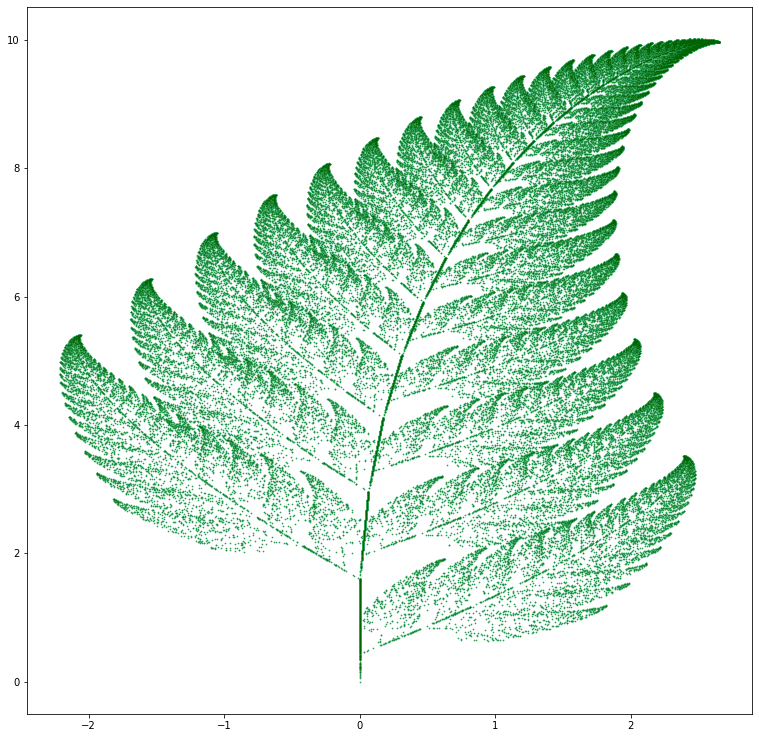

In [11]:
from random import randint
import matplotlib.pyplot as plt

# Initialize the lists
x = [0]
y = [0]

# Loop many times
for n in range(100000):
    
    rand_val = randint(1, 100)
    
    if rand_val == 1:
        x_new = 0
        y_new = 0.16 * y[n]
    
    if 2 <= rand_val <= 86:
        x_new = 0.85 * x[n] + 0.04 * y[n]
        y_new = -0.04 * x[n] + 0.85 * y[n] + 1.6
        
    if 87 <= rand_val <= 93:
        x_new = 0.2 * x[n] - 0.26 * y[n]
        y_new = 0.23 * x[n] + 0.32 * y[n] + 1.6
        
    if 94 <= rand_val <= 100:
        x_new = -0.15 * x[n] + 0.28 * y[n]
        y_new = 0.26 * x[n] + 0.24 * y[n] + 0.44
        
    x.append(x_new)
    y.append(y_new)
    
# Make the plot
plt.figure(figsize=(13, 13))
plt.scatter(x, y, s=0.5, edgecolor='mediumseagreen')
plt.scatter(x, y, s=0.01, edgecolor='darkgreen')

This code works, but there are ways we can improve how it's written. 

In general, it is a good idea to separate the data generation process from the plotting process. By separating the part of the code that generates the data from the code that plots it, we keep the code easy to read and configurable. Let me demonstrate what I mean. Let's re-write the code, but this time, we will put the part of the code that handles generating the data into a function.

In [12]:
from random import randint
import matplotlib.pyplot as plt

In [14]:
def get_data():
    """ 
    Returns a pair of values (x, y).
    
    The data is an example of an Iterated Function System (IFS).
    
    Outputs
    ---------
      x : a vector of numbers
      y : a vector of numbers
      
    """
    
    x = [0]
    y = [0]

    for n in range(100000):
    
        rand_val = randint(1, 100)

        if rand_val == 1:
            x_new = 0
            y_new = 0.16 * y[n]

        if 2 <= rand_val <= 86:
            x_new = 0.85 * x[n] + 0.04 * y[n]
            y_new = -0.04 * x[n] + 0.85 * y[n] + 1.6

        if 87 <= rand_val <= 93:
            x_new = 0.2 * x[n] - 0.26 * y[n]
            y_new = 0.23 * x[n] + 0.32 * y[n] + 1.6

        if 94 <= rand_val <= 100:
            x_new = -0.15 * x[n] + 0.28 * y[n]
            y_new = 0.26 * x[n] + 0.24 * y[n] + 0.44

        x.append(x_new)
        y.append(y_new)
        
    return (x, y)

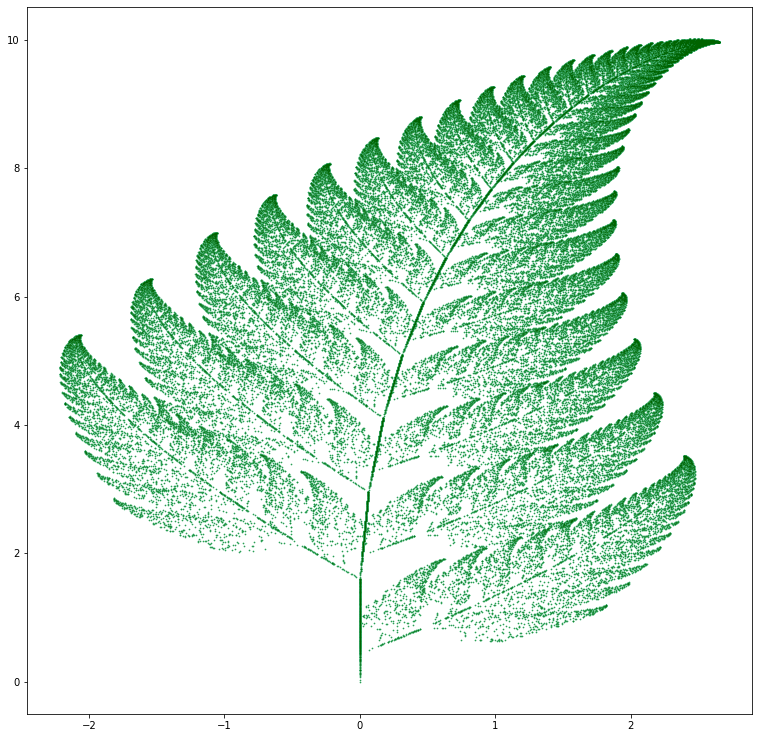

In [15]:
(x, y) = get_data()

plt.figure(figsize=(13, 13))
plt.scatter(x, y, s=0.5, edgecolor='mediumseagreen')
plt.scatter(x, y, s=0.01, edgecolor='darkgreen')

The output is exactly the same. So why bother?

By separating the data generation part of the code, we make it clearer to reader what is the exact output of the data it's just a pair of (x,y) values. We hide the details of how the data is generated from the user. By the time we get to the plotting part of the code, it's clear that the only variables that the plot cares about are `x` and `y`.

Writing the code this way also enables us to more easily perform sensitivity studies. For example, suppose we wanted to study the impact of the number of iterations on the outcome. We can modify the function like so:
    
    

In [21]:
def get_data_2(n=100000):
    """ 
    Returns a pair of values (x, y).
    
    The data is an example of an Iterated Function System (IFS).
    
    Parameters
    ---------
      n : number of iterations (default = 100000)
      
    Outputs
    ---------
      x : a vector of numbers
      y : a vector of numbers
      
    """
    
    x = [0]
    y = [0]

    for n in range(n):
    
        rand_val = randint(1, 100)

        if rand_val == 1:
            x_new = 0
            y_new = 0.16 * y[n]

        if 2 <= rand_val <= 86:
            x_new = 0.85 * x[n] + 0.04 * y[n]
            y_new = -0.04 * x[n] + 0.85 * y[n] + 1.6

        if 87 <= rand_val <= 93:
            x_new = 0.2 * x[n] - 0.26 * y[n]
            y_new = 0.23 * x[n] + 0.32 * y[n] + 1.6

        if 94 <= rand_val <= 100:
            x_new = -0.15 * x[n] + 0.28 * y[n]
            y_new = 0.26 * x[n] + 0.24 * y[n] + 0.44

        x.append(x_new)
        y.append(y_new)
        
    return (x, y)

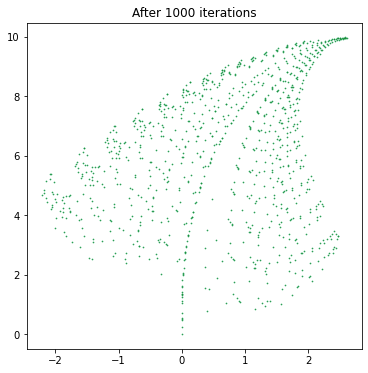

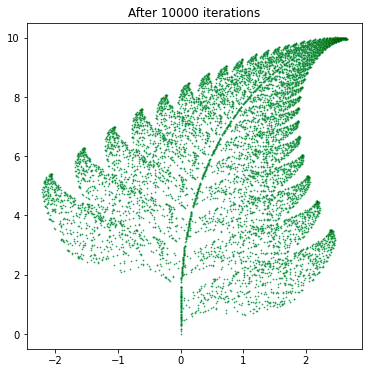

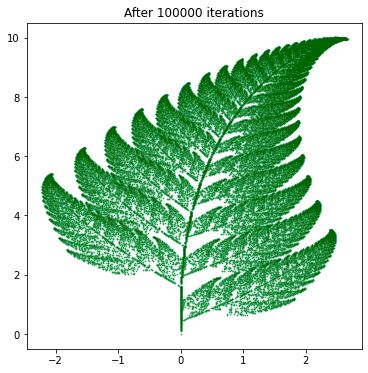

In [22]:
num_iterations_vec = [1000, 10000, 100000]

for n in num_iterations_vec:
    
    (x, y) = get_data_2(n)

    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, s=0.5, edgecolor='mediumseagreen')
    plt.scatter(x, y, s=0.01, edgecolor='darkgreen')
    plt.title(f'After {n} iterations')

Voila! Now imagine having to do this using the very first iteration of the code. That would have taken more lines of code and we would have duplicated some of the code. A universally accepted rule in programming is Don't Repeat Yourself (DRY). 

Now suppose we wanted to explore what happens if we mess around with the affine transformation parameters in the model. Let's re-define the function with more input parameters.

In [23]:
def get_data_3(n=100000, param=0.32):
    """ 
    Returns a pair of values (x, y).
    
    The data is an example of an Iterated Function System (IFS).
    
    Parameters
    ---------
      n     : number of iterations (default=100000)
      param : an affine transformation parameter (default=0.32)
      
    Outputs
    ---------
      x : a vector of numbers
      y : a vector of numbers
      
    """
    
    x = [0]
    y = [0]

    for n in range(n):
    
        rand_val = randint(1, 100)

        if rand_val == 1:
            x_new = 0
            y_new = 0.16 * y[n]

        if 2 <= rand_val <= 86:
            x_new = 0.85 * x[n] + 0.04 * y[n]
            y_new = -0.04 * x[n] + 0.85 * y[n] + 1.6

        if 87 <= rand_val <= 93:
            x_new = 0.2 * x[n] - 0.26 * y[n]
            y_new = 0.23 * x[n] + param * y[n] + 1.6

        if 94 <= rand_val <= 100:
            x_new = -0.15 * x[n] + 0.28 * y[n]
            y_new = 0.26 * x[n] + 0.24 * y[n] + 0.44

        x.append(x_new)
        y.append(y_new)
        
    return (x, y)

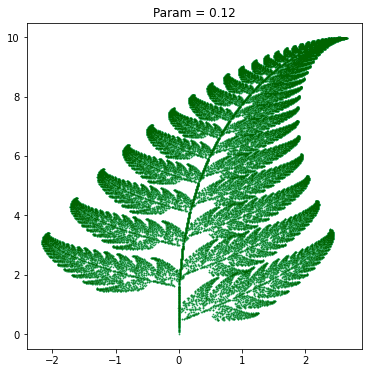

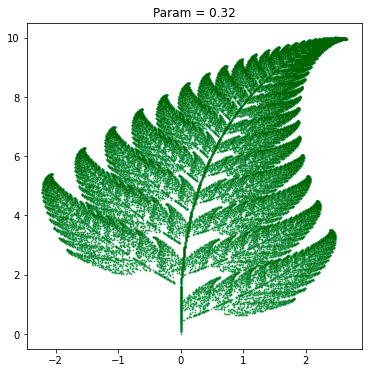

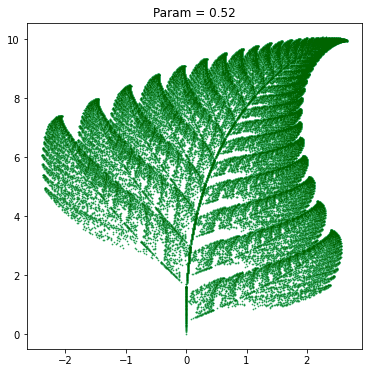

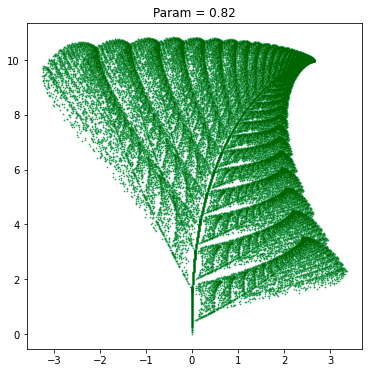

In [24]:
params_vec = [0.12, 0.32, 0.52, 0.82]

for param in params_vec:
    
    (x, y) = get_data_3(param=param)

    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, s=0.5, edgecolor='mediumseagreen')
    plt.scatter(x, y, s=0.01, edgecolor='darkgreen')
    plt.title(f'Param = {param}')

You can imagine adding even more input parameters into the function. By packaging the function in this way, you provide more flexibility into the data visualization and analysis process.